In [1]:
import kahnstatspy.GSLIB as GSLIB
import kahnstatspy.geostats as geostats
import numpy as np                                      
import pandas as pd                                   
import matplotlib.pyplot as plt     
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.validation import explain_validity
#from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import seaborn as sns
from scipy import stats
from scipy.stats import linregress

In [2]:
%matplotlib inline

# Load UG90 Excel File

In [3]:
df = pd.read_csv("UG90 PROJECT.csv") #Create a data frame containing UG90 data called df

# Increasing the X and Y coordinates by 0.001
df_mod = df.copy()
df_mod['X'] = df['X'] + 0.001
df_mod['Y'] = df['Y'] + 0.001

# load Boundary Files

In [4]:
df_lease = pd.read_excel('lease Boundary.xlsx')
df_measured = pd.read_excel('UG2 measured.xlsx')

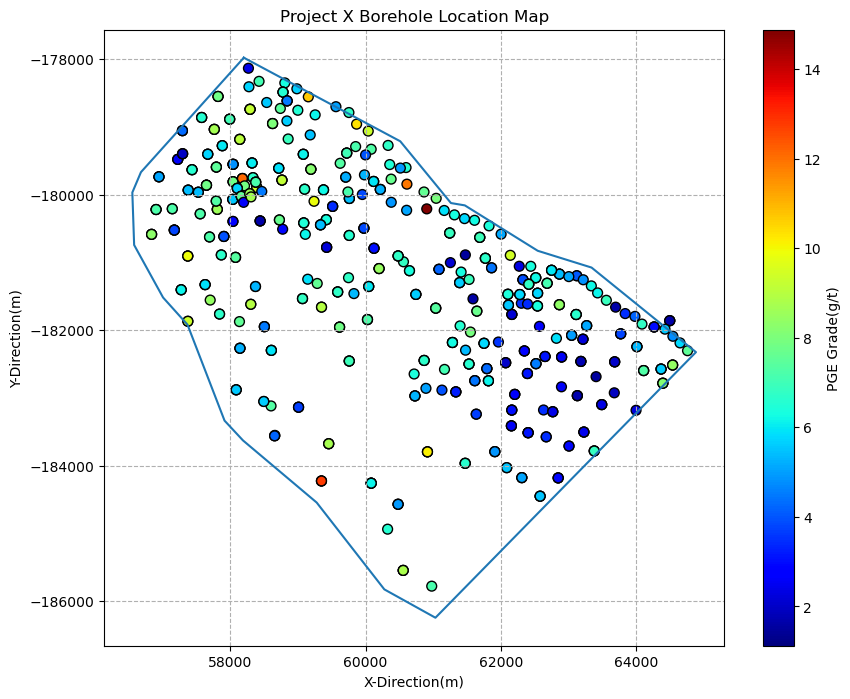

In [5]:
plt.figure(figsize=(10, 8))
plt.scatter(df_mod['X'], df_mod['Y'], c = df_mod['PGE'], s = 50, 
            edgecolors = 'black',cmap = 'jet')
cbar = plt.colorbar()
cbar.set_label("PGE Grade(g/t)", loc = 'center')
plt.title("Project X Borehole Location Map")
plt.xlabel("X-Direction(m)")
plt.ylabel("Y-Direction(m)")
plt.grid(linestyle = '--')
#plt.plot(df_lease['X'],df_lease['Y'])
plt.plot(df_measured['X'],df_measured['Y'])
plt.show()

# Input Variogram Parameters

In [6]:
nug = 0.1; nst = 3                                             # 3 nest structure variogram model parameters
it1 = 1; cc1 = 0.15; azi1 = 135; hmaj1 = 200; hmin1 = 200
it2 = 1; cc2 = 0.65; azi2 = 135; hmaj2 = 1000; hmin2 = 800
it3 = 1; cc3 = 0.1;azi3 = 135; hmaj3 = 5000;hmin3 =4500

cv_vario2 = GSLIB.make_variogram3(nug,nst,it1,cc1,azi1,hmaj1,hmin1,it2,cc2,azi2,hmaj2,hmin2,
                                  it3,cc3,azi3,hmaj3,hmin3) # porosity variogram

xmin = df_measured.X.min(); xmax = df_measured.X.max()              # range of x values
ymin = df_measured.Y.min(); ymax = df_measured.Y.max() 

## Run kb2d_3 function

In [7]:
kmap,vmap,weigths_map,cbb,s,vk = geostats.kb2d_3(df_mod,'X','Y','PGE',-9999.9,9999.9,250,xmin,20,250,ymin,20,2,4,
                                  12,15,3400,1,0,cv_vario2)

UNEST at 0,0
Error processing block 0,0: Solution array "s" is not valid.
UNEST at 1,0
Error processing block 1,0: Solution array "s" is not valid.
UNEST at 2,0
Error processing block 2,0: Solution array "s" is not valid.
UNEST at 3,0
Error processing block 3,0: Solution array "s" is not valid.
UNEST at 4,0
Error processing block 4,0: Solution array "s" is not valid.
UNEST at 5,0
Error processing block 5,0: Solution array "s" is not valid.
UNEST at 6,0
Error processing block 6,0: Solution array "s" is not valid.
UNEST at 7,0
Error processing block 7,0: Solution array "s" is not valid.
UNEST at 8,0
Error processing block 8,0: Solution array "s" is not valid.
UNEST at 9,0
Error processing block 9,0: Solution array "s" is not valid.
UNEST at 10,0
Error processing block 10,0: Solution array "s" is not valid.
UNEST at 11,0
Error processing block 11,0: Solution array "s" is not valid.
UNEST at 12,0
Error processing block 12,0: Solution array "s" is not valid.
UNEST at 13,0
Error processing b

UNEST at 0,4
Error processing block 0,4: Solution array "s" is not valid.
UNEST at 1,4
Error processing block 1,4: Solution array "s" is not valid.
UNEST at 2,4
Error processing block 2,4: Solution array "s" is not valid.
UNEST at 3,4
Error processing block 3,4: Solution array "s" is not valid.
UNEST at 4,4
Error processing block 4,4: Solution array "s" is not valid.
UNEST at 5,4
Error processing block 5,4: Solution array "s" is not valid.
UNEST at 6,4
Error processing block 6,4: Solution array "s" is not valid.
UNEST at 7,4
Error processing block 7,4: Solution array "s" is not valid.
UNEST at 8,4
Error processing block 8,4: Solution array "s" is not valid.
UNEST at 9,4
Error processing block 9,4: Solution array "s" is not valid.
UNEST at 10,4
Error processing block 10,4: Solution array "s" is not valid.
UNEST at 11,4
Error processing block 11,4: Solution array "s" is not valid.
UNEST at 12,4
Error processing block 12,4: Solution array "s" is not valid.
UNEST at 13,4
Error processing b

UNEST at 0,9
Error processing block 0,9: Solution array "s" is not valid.
UNEST at 1,9
Error processing block 1,9: Solution array "s" is not valid.
UNEST at 2,9
Error processing block 2,9: Solution array "s" is not valid.
UNEST at 3,9
Error processing block 3,9: Solution array "s" is not valid.
UNEST at 4,9
Error processing block 4,9: Solution array "s" is not valid.
UNEST at 5,9
Error processing block 5,9: Solution array "s" is not valid.
UNEST at 6,9
Error processing block 6,9: Solution array "s" is not valid.
UNEST at 7,9
Error processing block 7,9: Solution array "s" is not valid.
UNEST at 8,9
Error processing block 8,9: Solution array "s" is not valid.
UNEST at 9,9
Error processing block 9,9: Solution array "s" is not valid.
UNEST at 10,9
Error processing block 10,9: Solution array "s" is not valid.
UNEST at 11,9
Error processing block 11,9: Solution array "s" is not valid.
UNEST at 12,9
Error processing block 12,9: Solution array "s" is not valid.
UNEST at 13,9
Error processing b

UNEST at 0,19
Error processing block 0,19: Solution array "s" is not valid.
UNEST at 1,19
Error processing block 1,19: Solution array "s" is not valid.
UNEST at 0,20
Error processing block 0,20: Solution array "s" is not valid.
  Estimated   62127 blocks 
      average   6.794709439361861  variance  0.72452857353003


## Kriging Weight Analysis (Custom functions)

In [8]:
def analyze_weights_distribution_enhanced(weights_map, kriging_variance, unest=-999.):
    """
    Enhanced analysis of kriging weights distribution, excluding cells with UNEST kriging variance values.
    
    Parameters:
    - weights_map: 3D numpy array containing kriging weights for each grid cell.
    - kriging_variance: 2D numpy array of kriging variance for each grid cell.
    - unest: The value used to indicate unestimated cells in the kriging variance map.
    
    Returns:
    A dictionary with analysis results:
    - average_significant_weights: The average number of significant weights per cell.
    - overall_negative_weight_proportion: The average proportion of negative weights per cell.
    - variability_significant_weights: The standard deviation of significant weights counts.
    - correlation_with_kriging_variance: Pearson correlation coefficient between significant weights counts and valid kriging variance.
    """
    ny, nx, _ = weights_map.shape
    significant_weight_counts = []
    negative_weight_proportions = []
    valid_kriging_variance = []

    # Analyze each cell in the grid
    for iy in range(ny):
        for ix in range(nx):
            # Exclude cells marked as UNEST
            if kriging_variance[iy, ix] != unest:
                cell_weights = weights_map[iy, ix]
                significant_weights = np.sum(cell_weights >= 0.01)  # Count weights deemed significant
                negative_weights = np.sum(cell_weights < 0)  # Count negative weights
                total_weights = len(cell_weights)  # Total number of weights

                significant_weight_counts.append(significant_weights)
                negative_weight_proportions.append(negative_weights / total_weights)
                valid_kriging_variance.append(kriging_variance[iy, ix])

    # Calculate correlation between significant weight counts and valid kriging variance
    correlation_with_kriging_variance = np.nan
    if len(valid_kriging_variance) > 0:
        correlation_with_kriging_variance = np.corrcoef(significant_weight_counts, valid_kriging_variance)[0, 1]

    # Compile results
    results = {
        'average_significant_weights': np.mean(significant_weight_counts),
        'overall_negative_weight_proportion': np.mean(negative_weight_proportions),
        'variability_significant_weights': np.std(significant_weight_counts),
        'correlation_with_kriging_variance': correlation_with_kriging_variance,
    }

    return results

In [9]:
analyze_weights_distribution_enhanced(weigths_map,vmap)

{'average_significant_weights': 13.685981940219229,
 'overall_negative_weight_proportion': 0.0871309977948396,
 'variability_significant_weights': 2.229868136054688,
 'correlation_with_kriging_variance': -0.2527516863387543}

In [10]:
import math
import geopandas as gpd
from shapely.geometry import Point

def analyze_directional_weights_distribution(weights_map, kriging_variance, xmin, xmax, ymin, ymax, unest=-999.):
    """
    Enhanced analysis of kriging weights distribution considering directional distribution,
    using grid coordinates derived from specified xmin, xmax, ymin, ymax.
    """
    # Define grid coordinates
    x_coords = np.linspace(xmin, xmax + 20 * (250 - 1), 250)
    y_coords = np.linspace(ymin, ymax + 20 * (250 - 1), 250)
    x_grid, y_grid = np.meshgrid(x_coords, y_coords)

    ny, nx, _ = weights_map.shape
    directional_weight_counts = {'NW-SE': [], 'NE-SW': []}

    def get_direction(x_diff, y_diff):
        angle = math.atan2(y_diff, x_diff) * (180 / math.pi)
        angle = (angle + 360) % 360  # Normalize angle to be in the range [0, 360)
        # Adjust direction categories for NW-SE preference
        if (45 < angle <= 135) or (225 < angle <= 315):
            return 'NE-SW'
        else:
            return 'NW-SE'

    # Iterate through each cell in the grid
    for iy in range(ny):
        for ix in range(nx):
            if kriging_variance[iy, ix] != unest:
                x_center = x_coords[ix]
                y_center = y_coords[iy]
                for neighbor_idx in range(weights_map.shape[2]):
                    # Calculate direction from current cell to each neighbor
                    x_neighbor = x_center + (neighbor_idx % nx) - (nx // 2)
                    y_neighbor = y_center + (neighbor_idx // ny) - (ny // 2)
                    x_diff = x_neighbor - x_center
                    y_diff = y_neighbor - y_center
                    direction = get_direction(x_diff, y_diff)
                    weight = weights_map[iy, ix, neighbor_idx]
                    if weight >= 0.05:  # Consider as significant weight
                        directional_weight_counts[direction].append(weight)
    
    # Calculate averages and variability for each direction
    directional_analysis_results = {}
    for direction, weights in directional_weight_counts.items():
        directional_analysis_results[f'average_{direction}'] = np.mean(weights) if weights else 0
        directional_analysis_results[f'variability_{direction}'] = np.std(weights) if weights else 0

    return directional_analysis_results

In [11]:
analyze_directional_weights_distribution(weigths_map, vmap, xmin, xmax, ymin, ymax)

{'average_NW-SE': 0.15647050364322299,
 'variability_NW-SE': 0.11663708405817837,
 'average_NE-SW': 0.08882053954078917,
 'variability_NE-SW': 0.043087881963763466}

# Validation and Metrics

In [12]:
def calculate_statistics(x, y, vr, kmap, xmn, ymn, xsiz, ysiz, nx, ny, unest=-999.):
    """
    Calculate statistical metrics comparing original data points with kriging block estimates using `predicted - observed`,
    excluding blocks where the prediction is UNEST.

    Parameters:
    - x, y: Arrays of x and y coordinates of the original data points.
    - vr: Array of observed values at the data points.
    - kmap: 2D array of kriging estimates for each block in the grid.
    - xmn, ymn: Coordinates of the lower-left corner of the grid.
    - xsiz, ysiz: Size of each block in the x and y directions.
    - nx, ny: Number of blocks in the x and y directions.
    - unest: The value used to indicate an undefined or invalid estimate.

    Returns:
    - A dictionary with MAE, MSE, and RMSE.
    """
    observed = []
    predicted = []

    # Iterate over each data point to find its corresponding block estimate
    for xi, yi, vri in zip(x, y, vr):
        ix = int((xi - xmn) / xsiz)
        iy = int((yi - ymn) / ysiz)

        # Ensure indices are within the grid bounds
        ix = min(max(ix, 0), nx - 1)
        iy = min(max(iy, 0), ny - 1)

        # Reverse y index to match grid orientation
        iy = ny - 1 - iy

        observed.append(vri)
        predicted.append(kmap[iy, ix])

    observed = np.array(observed)
    predicted = np.array(predicted)

    # Filter out UNEST values
    valid_mask = predicted != unest
    valid_observed = observed[valid_mask]
    valid_predicted = predicted[valid_mask]

    # Calculate statistical metrics with `predicted - observed` for valid data only
    differences = valid_predicted - valid_observed
    mae = np.mean(np.abs(differences))
    mse = np.mean(differences ** 2)
    rmse = np.sqrt(mse)

    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
    }

In [13]:
X = np.array(df_mod['X'].values)
Y = np.array(df_mod['Y'].values)
VR = np.array(df_mod['PGE'])

In [14]:
calculate_statistics(X, Y, VR, kmap, xmin, ymin, 20, 20, 250, 250)

{'MAE': 1.6288996665790743, 'MSE': 4.67113335704989, 'RMSE': 2.161280490137708}

In [15]:
def plot_observed_vs_predicted_and_residualsX1(x, y, vr, kmap, xmn, ymn, xsiz, ysiz, nx, ny, unest=-999.):
    observed = []
    predicted = []

    # Iterate over each data point to find its corresponding block estimate
    for xi, yi, vri in zip(x, y, vr):
        ix = int((xi - xmn) / xsiz)
        iy = int((yi - ymn) / ysiz)
        ix = min(max(ix, 0), nx - 1)
        iy = min(max(iy, 0), ny - 1)
        iy = ny - 1 - iy

        observed.append(vri)
        predicted.append(kmap[iy, ix])

    observed = np.array(observed)
    predicted = np.array(predicted)

    # Filter out UNEST values
    valid_mask = predicted != unest
    valid_observed = observed[valid_mask]
    valid_predicted = predicted[valid_mask]
    valid_residuals = valid_predicted - valid_observed

    # Apply IQR method for outlier detection
    Q1, Q3 = np.percentile(valid_residuals, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask = (valid_residuals >= lower_bound) & (valid_residuals <= upper_bound)
    
    # Filter outliers from the valid data
    final_observed = valid_observed[outlier_mask]
    final_predicted = valid_predicted[outlier_mask]
    final_residuals = valid_residuals[outlier_mask]

   
    fig, axs = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 3]})

# First subplot for histogram of residuals
    sns.histplot(final_residuals, kde=False, bins=15, color='orange', ax=axs[0])
    axs[0].set_xlabel('Residuals')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('Histogram of residuals for a Ordinary Kriging model')
    axs[0].grid(ls='--')

    # Second subplot for scatter plot of predicted vs actual values with regression line
    sns.regplot(x=final_predicted, y=final_observed, color='gray', ax=axs[1])

# Calculate the linear regression values
    slope, intercept, r_value, p_value, std_err = stats.linregress(final_predicted, final_observed)

# Annotate the slope, intercept, and R-squared on the plot
    text = f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nR-squared: {r_value**2:.2f}'
    axs[1].annotate(text, xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
                bbox=dict(boxstyle='round', alpha=0.3))

# Set labels and title
    axs[1].set_xlabel('Predicted Values')
    axs[1].set_ylabel('Actual Values')
    axs[1].set_title('Predicted vs Actual scatter plot for a Ordinary Kriging regression model')
    axs[1].grid(ls='--')
    
    plt.tight_layout()
    plt.show()

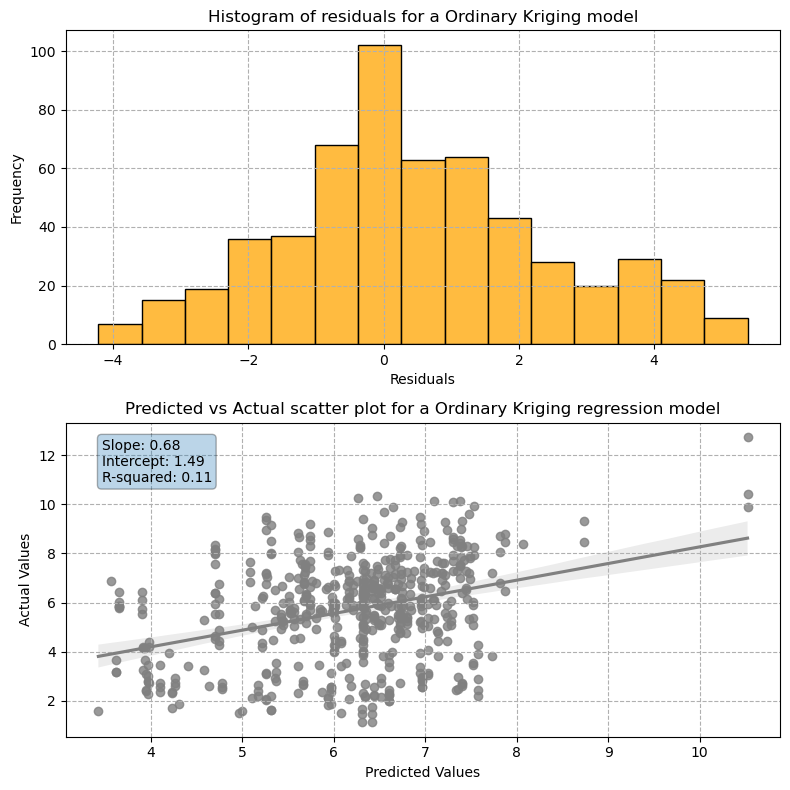

In [16]:
plot_observed_vs_predicted_and_residualsX1(X, Y, VR, kmap, xmin, ymin, 20, 20, 250, 250)

# visualisation(s)

In [18]:
# Assuming df_measured contains the X and Y coordinates for the boundary
if not df_measured.X.empty and not df_measured.Y.empty:
    df_measured['X'] = pd.to_numeric(df_measured.X, errors='coerce')
    df_measured['Y'] = pd.to_numeric(df_measured.Y, errors='coerce')
    
    if df_measured.X.notna().all() and df_measured.Y.notna().all():
        coords = list(zip(df_measured.X, df_measured.Y))
        
        # Ensure the polygon forms a closed loop
        if coords[0] != coords[-1]:
            coords.append(coords[0])
        
        boundary_polygon = Polygon(coords)
        
        # Check if the polygon is valid using Shapely's is_valid
        if not boundary_polygon.is_valid:
            raise ValueError("The created polygon is not valid.")

        boundary_gdf = gpd.GeoDataFrame(geometry=[boundary_polygon], crs="EPSG:32735")
    else:
        raise ValueError("DataFrame columns X and Y contain non-numeric values.")
else:
    raise ValueError("DataFrame columns X and Y are empty.")

In [19]:
# Assuming df_mod contains the points to be kriged
gdf = gpd.GeoDataFrame(df_mod, geometry=gpd.points_from_xy(df_mod.X, df_mod.Y))

# Make sure the CRS for both GeoDataFrames match before the spatial join
gdf.crs = boundary_gdf.crs

# Perform spatial join to filter points within the boundary
gdf_within_boundary = gpd.sjoin(gdf, boundary_gdf, predicate='within')

## Kriging estimate Map

In [20]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming 'kriging_2d' is your 2D array of kriging estimates
# 'boundary_gdf' is your GeoDataFrame with the boundary polygon
# 'gdf_within_boundary' contains the points within the boundary

# First, convert the 2D array of kriging estimates to a GeoDataFrame
# Create an (x, y) grid of points that corresponds to the kriging estimates
x_coords = np.linspace(xmin, xmax + (250 - 1), 250)
y_coords = np.linspace(ymin, ymax + (250 - 1), 250)
x_grid, y_grid = np.meshgrid(x_coords, y_coords)

# Flatten the grid and estimates for creating a GeoDataFrame
x_grid_flat = x_grid.ravel()
y_grid_flat = y_grid.ravel()
kriging_flat = kmap.ravel()

# Create a GeoDataFrame from the flattened grid and estimates

kriging_gdf = gpd.GeoDataFrame(
    {'Estimate': kriging_flat},
    geometry=gpd.points_from_xy(x_grid_flat, y_grid_flat),
    crs="EPSG:32735"  # Ensure the CRS matches that of the boundary
)

# Clip the kriging estimates to the boundary polygon
clipped_kriging_gdf = gpd.clip(kriging_gdf, boundary_gdf).copy()

# Extract X and Y coordinates from the 'geometry' column
clipped_kriging_gdf['X'] = clipped_kriging_gdf.geometry.x
clipped_kriging_gdf['Y'] = clipped_kriging_gdf.geometry.y

# Pivot the DataFrame to match the original kriging estimate grid size
clipped_kmap = clipped_kriging_gdf.pivot(index='Y', columns='X', values='Estimate').fillna(np.nan).values

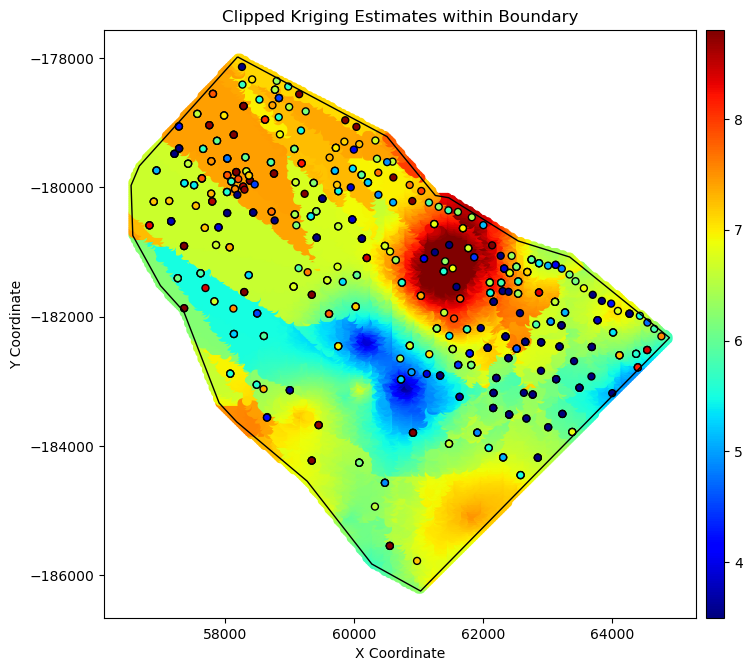

In [21]:
# Now we can visualize the clipped kriging estimates
fig, ax = plt.subplots(figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)

# Find the global minimum and maximum values for the color scale
#vmin = min(gdf_within_boundary['PGE'].min(), clipped_kriging_gdf['Estimate'].min())
#vmax = max(gdf_within_boundary['PGE'].max(), clipped_kriging_gdf['Estimate'].max())

# Plotting the clipped kriging estimates
clipped_kriging_gdf.plot(column='Estimate', ax=ax, legend=True, cax=cax, cmap='jet', vmin = 3.5, vmax = 8.8)

# Overlay the boundary for reference
boundary_gdf.boundary.plot(ax=ax, color='black', linewidth=1, ls = '-')

# Overlay the sample points within the boundary
gdf_within_boundary.plot(ax=ax, column='PGE', edgecolor='black', markersize=25, cmap='jet', vmin = 3.5, vmax = 8.8)


# Customize the plot with labels and a title
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Clipped Kriging Estimates within Boundary')

# Show the plot
plt.show()

## Kriging weight map

In [22]:
from shapely.geometry import Point
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Corrections and assumptions made here
x_coords = np.linspace(xmin, xmax + (250 - 1), 250)
y_coords = np.linspace(ymin, ymax + (250 - 1), 250)
x_grid, y_grid = np.meshgrid(x_coords, y_coords)

# Assuming 'weights_map' is correctly named and is a 3D array where the third dimension has the weights
# Assuming 'boundary_gdf' is a correctly structured GeoDataFrame containing the boundary polygon

weighted_points_within_boundary = []

# Iterate through each cell in the weights_map
for i in range(weigths_map.shape[0]):
    for j in range(weigths_map.shape[1]):
        # Assume each grid cell's center represents its location
        point = Point(x_grid[j, i], y_grid[j, i])  # Note the order of indices j, i for y, x coordinates
        
        # Check if the Point is within the boundary polygon
        if boundary_gdf.contains(point).any():
            # For each point within the boundary, add its weights to the list
            # Here, we're assuming we want to visualize the first set of weights for simplicity
            weighted_points_within_boundary.append((point.x, point.y, weigths_map[i, j, 0]))

# Convert the list to a GeoDataFrame for plotting
weighted_points_gdf = gpd.GeoDataFrame(weighted_points_within_boundary, columns=['X', 'Y', 'Weight'], 
                                       geometry=gpd.points_from_xy([p[0] for p in weighted_points_within_boundary], 
                                                                   [p[1] for p in weighted_points_within_boundary]),
                                       crs="EPSG:32735")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


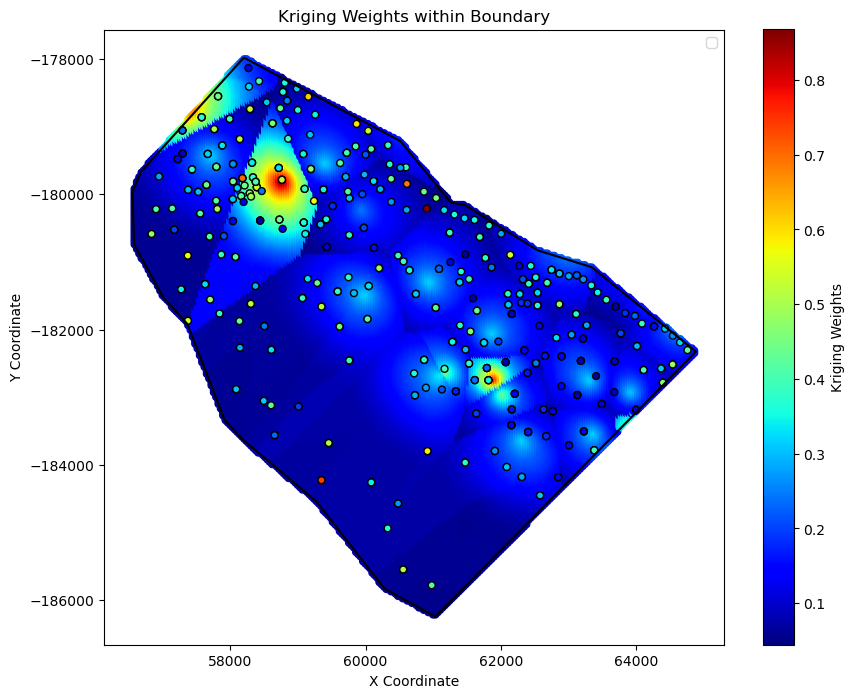

In [23]:
# Plot the weighted points with a colormap reflecting their weights
fig, ax = plt.subplots(figsize=(10, 8))
weighted_points_gdf.plot(ax=ax, column='Weight', legend=True, 
                         cmap='jet', marker='o', markersize=25, 
                         legend_kwds={'label': "Kriging Weights"})

# Plot the boundary on the same axes for context
boundary_gdf.boundary.plot(ax=ax, color='black', linewidth=1.5, ls = '-')

# Overlay the sample points within the boundary
gdf_within_boundary.plot(ax=ax, column='PGE', edgecolor='black', markersize=25, cmap='jet')

ax.set_title('Kriging Weights within Boundary')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.legend()

plt.show()